In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df = pd.DataFrame(data = df)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good quality of wine

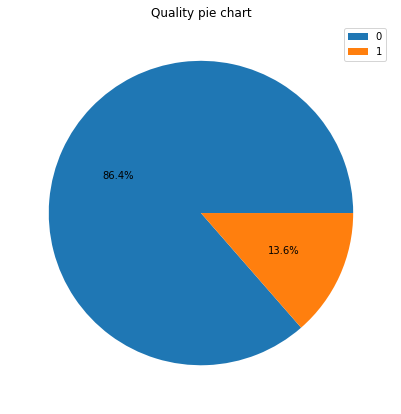

The good quality wines count for 13.6 %.


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
labels= df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")

plt.title("Quality pie chart")
plt.show()
print('The good quality wines count for',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')

In [18]:
import numpy as np
from scipy.stats import zscore
z = np.abs(zscore(df))
thresholds = 3
df = df[(z<3).all(axis=1)]

In [19]:
df.shape

(1451, 13)

In [20]:
dfcorr = df.corr()
dfcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163,0.125791
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443,-0.267836
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999,0.227633
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787,-0.112080
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202,-0.086402
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567,0.310432


In [21]:
import seaborn as sns

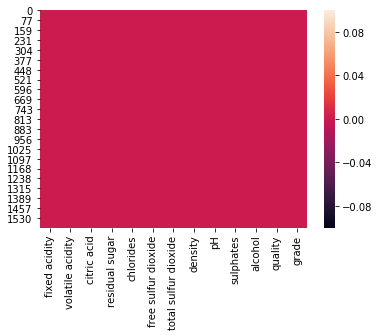

In [22]:
sns.heatmap(df.isnull())

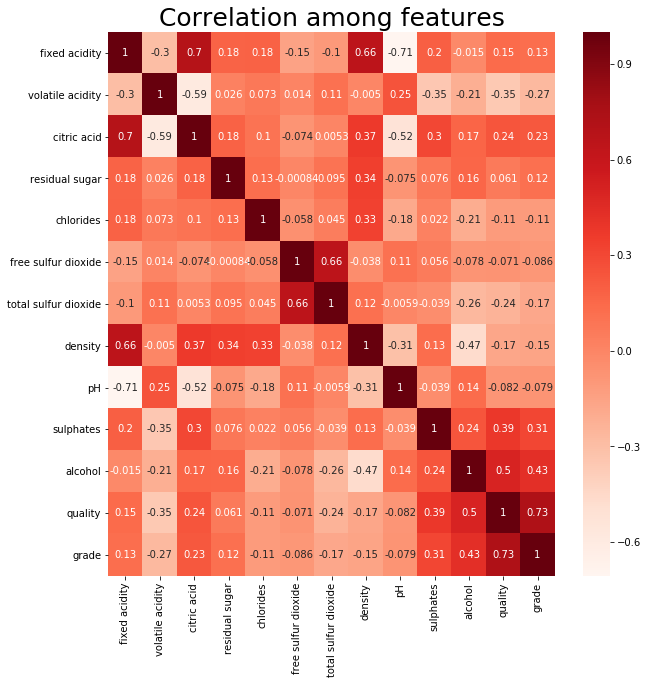

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr, cmap="Reds", annot = True)
plt.title("Correlation among features",  y = 1.05,fontsize = 25)
plt.show()

In [25]:
x = df.iloc[:, 0:-2].values

In [26]:
y = df.iloc[:,-2]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state=47)


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [29]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

1.0

In [30]:
pred = dtc.predict(x_test)

In [31]:
pred

array([6, 7, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 4, 5,
       7, 5, 5, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5,
       6, 5, 6, 6, 7, 7, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6, 7,
       5, 5, 6, 6, 6, 7, 8, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       7, 6, 4, 6, 6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 4, 7, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 5, 7, 6, 6, 7, 5, 7, 6, 5, 7, 5, 6, 6, 5, 6, 5, 6,
       5, 5, 6, 6, 5, 4, 5, 5, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7,
       6, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 7,
       7, 5, 5, 6, 5, 6, 6, 7, 6, 7, 7, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5, 5,
       5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 5,

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.6304801670146137
[[  1  11   2   0   0]
 [  4 149  51   5   0]
 [  4  53 110  14   1]
 [  1   8  19  41   0]
 [  0   2   0   2   1]]
              precision    recall  f1-score   support

           4       0.10      0.07      0.08        14
           5       0.67      0.71      0.69       209
           6       0.60      0.60      0.60       182
           7       0.66      0.59      0.63        69
           8       0.50      0.20      0.29         5

   micro avg       0.63      0.63      0.63       479
   macro avg       0.51      0.44      0.46       479
weighted avg       0.62      0.63      0.63       479



In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

In [39]:
dt= dtc.predict_proba(x_test)[:, 0]

In [40]:
tpr,fpr,_= roc_curve(y_test, dt)

ValueError: multiclass format is not supported